# Entropy

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat May  5 10:26:12 2018

@author: Shivendra Kumar


Awesome exercises on machine learning
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
loan_data = pd.read_csv('LoanApplicationData.csv', sep= ',')

print ("Dataset Lenght:: ", len(loan_data))
print ("Dataset Shape:: ", loan_data.shape)

print ("Dataset:: ")

Dataset Lenght::  15
Dataset Shape::  (15, 5)
Dataset:: 


In [3]:
loan_data.head()

,Age,Has_job,own_house,credit_rating,Class
0,1,0,0,1,0
1,1,0,0,2,0
2,1,1,0,2,1
3,1,1,1,1,1
4,1,0,0,1,0


In [5]:
loan_data.describe()

,Age,Has_job,own_house,credit_rating,Class
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2.000000,0.333333,0.400000,1.933333,0.600000
std,0.845154,0.487950,0.507093,0.798809,0.507093
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,0.000000,0.000000,2.000000,1.000000
75%,3.000000,1.000000,1.000000,2.500000,1.000000
max,3.000000,1.000000,1.000000,3.000000,1.000000


In [6]:
X = loan_data.iloc[:, 0:4]

In [7]:
Y = loan_data.iloc[:,4]

In [8]:
#X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.01, random_state = 100)
X_train = X
y_train = Y

In [9]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=1)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [10]:
"""features = loan_data.columns[1:]

#My method to create visualization
#def visualize_tree(tree, feature_names):
   Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")
        """

'features = loan_data.columns[1:]\n\n#My method to create visualization\n#def visualize_tree(tree, feature_names):\n   Create tree png using graphviz.\n\n    Args\n    ----\n    tree -- scikit-learn DecsisionTree.\n    feature_names -- list of feature names.\n    \n    with open("dt.dot", \'w\') as f:\n        export_graphviz(tree, out_file=f,\n                        feature_names=feature_names)\n\n    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]\n    try:\n        subprocess.check_call(command)\n    except:\n        exit("Could not run dot, ie graphviz, to "\n             "produce visualization")\n        '

In [21]:
#Draw the tree for visalization
        
#visualize_tree(clf_gini,features)
from sklearn.externals.six import StringIO 
from IPython.display import Image 

In [24]:
import os     

os.environ["PATH"] += os.pathsep + 'D:/Graphviz/bin'

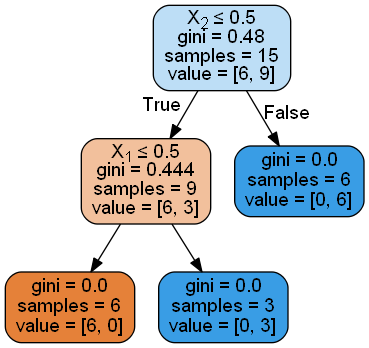

In [25]:
import pydotplus
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [26]:
#visualize_tree

In [27]:
from sklearn.externals.six import StringIO 
from IPython.display import Image 
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=3)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

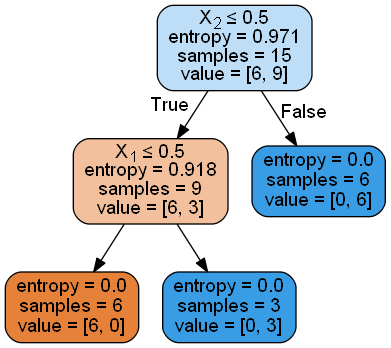

In [28]:
import pydotplus
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [29]:
# Visualize our decision trees

	

In [30]:
clf_gini.predict([[1, 1, 1, 1]])

array([1], dtype=int64)

In [31]:
clf_gini.predict([[1, 0, 0, 1]])

array([0], dtype=int64)

In [32]:
y_pred=clf_entropy.predict(X)

In [33]:
print ("Accuracy is ", accuracy_score(Y,y_pred)*100)

Accuracy is  100.0
